In [42]:
import collections
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json  
import networkx as nx
import igraph as ig

In [62]:
# load in user data 
Yelp_Users = pd.read_json('YelpDataset/user.json',lines=True)

# filter out people with no friends
Yelp_Users['number_of_friends'] = Yelp_Users['friends'].apply(len)
df_usersNarrow = Yelp_Users[Yelp_Users['number_of_friends']>0] 
df_usersNarrow = df_usersNarrow[['user_id','friends','number_of_friends']]

# load in review data
Yelp_Reviews = pd.read_json('YelpDataset/review.json',lines=True)

## Finding most common business ratings

In [4]:
# distribution of mean star rating and review count

user_agg=Yelp_Reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})
user_agg=user_agg.sort_values([('stars','mean')],ascending=False)
print("          Users sorted by mean star rating")
user_agg[('stars','mean')].head(10)

          Users sorted by mean star rating


user_id
UyeWPntJbCiivtpOkkuEcg    5.0
VfSyvigzBvzrQtlw16LlvA    5.0
VfQbHHo4nYGdyeY40Uo5Mg    5.0
VfQwF3hwy0ACItuHbL3zkA    5.0
VfRavspLv-6cbUlGgLg3BA    5.0
VfRh4vzkk_9cM2g_leKFCg    5.0
VfRu1Lav8qJKv0qPwzZcfw    5.0
VfSPwGzBY0eJH-lHUV0WPw    5.0
VfSr9zZbxhVGRRHOr2Poig    5.0
VfSxRJUHnOddsYTNt7ohSQ    5.0
Name: (stars, mean), dtype: float64

In [6]:
numberMeanRating = user_agg[('stars','mean')].value_counts()
npnumberMeanRating = np.asarray(numberMeanRating)
xArrPlot = numberMeanRating.index.tolist()

In [7]:
# top 5 (descending order) most frequent business ratings
npnumberMeanRating[0:5]
xArrPlot[0:5]

[5.0, 1.0, 4.0, 3.0, 2.0]

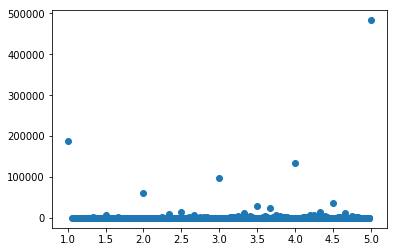

In [8]:
# distribution of business ratings
plt.scatter(xArrPlot,npnumberMeanRating)
plt.show()

## Looking at behavior of top Yelp users

In [10]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id       date            useful  funny   cool  \
                           count        min        max    sum    sum    sum   
user_id                                                                       
CxDOIDnH8gp9KXzpBHJYXw      3569 2009-11-09 2017-12-05  11345   5546   6695   
bLbSNkLggFnqwNNzzq-Ijw      2077 2012-05-20 2017-12-11  23572  12630  16303   
PKEzKWv_FktMm2mGPjwd0Q      1611 2008-12-12 2017-12-05  12078   4987   8183   
DK57YibC5ShBmqQl97CKog      1463 2006-02-12 2017-12-10  13175   6693  10795   
QJI9OSEn6ujRCtrX06vs1w      1322 2007-03-20 2016-05-01   8748   4104   6142   
d_TBs6J3twMy9GChqUEXkg      1184 2010-12-27 2017-11-23   2992   1341   1792   
ELcQDlf69kb-ihJfxZyL0A      1159 2011-04-10 2017-12-10   2155   1298   1029   
cMEtAiW60I5wE_vLfTxoJQ      1126 2009-06-12 2017-12-07   1943   1213   1509   
hWDybu_KvYLSdEFzGrniTw      1117 2009-03-08 2017-11-26   7234   4968   5762   
U4INQZOPSUaj8hMjLlZ3KA      1101 2008-05-13 2017-12-11   6116   2832   4187   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.201737  
bLbSNkLggFnqwNNzzq-Ijw  3.256139  
PKEzKWv_FktMm2mGPjwd0Q  3.664804  
DK57YibC5ShBmqQl97CKog  3.826384  
QJI9OSEn6ujRCtrX06vs1w  3.622542  
d_TBs6J3twMy9GChqUEXkg  3.463682  
ELcQDlf69kb-ihJfxZyL0A  2.993097  
cMEtAiW60I5wE_vLfTxoJQ  4.066607  
hWDybu_KvYLSdEFzGrniTw  3.640107  
U4INQZOPSUaj8hMjLlZ3KA  3.714805

## Distribution of number of user friends

In [4]:
# get the frequencies of the number of friends and convert to numpy array

numberFriends = Yelp_Users['number_of_friends'].value_counts()
npnumberFriends = np.asarray(numberFriends)

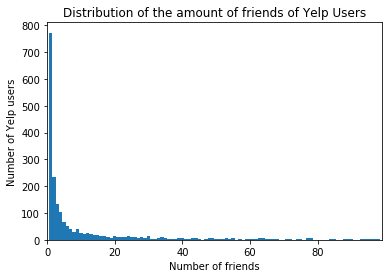

In [5]:
# plot this frequency of number of friends distribution

hist, bin_edges = np.histogram(npnumberFriends, bins = range(100))
plt.bar(bin_edges[:-1],hist,width = 1)
plt.xlim(min(bin_edges),max(bin_edges))
plt.title('Distribution of the amount of friends of Yelp Users')
plt.xlabel('Number of friends')
plt.ylabel('Number of Yelp users')
plt.show()

In [8]:
def percentageWithFriendsGreaterThan(threshold):
    return len(Yelp_Users[Yelp_Users['number_of_friends']>threshold])/len(Yelp_Users['friends'])*100
    
def percentageWithNumberOfFriends(friends):
    return numberFriends[friends]/len(Yelp_Users['friends'])*100
    
print(str(percentageWithNumberOfFriends(0))+"% of users have no friends on Yelp.")
print(str(percentageWithFriendsGreaterThan(0))+"% of users have at least one friend.")
print(str(percentageWithFriendsGreaterThan(0)/100 * len(Yelp_Users)) +" users have at least one friend.")


42.6885282494% of users have no friends on Yelp.
57.31147175064343% of users have at least one friend.
760008.0 users have at least one friend.
